### Nama : Ricky Akbar Pratama

### NIM    : 09011381823082

### SK5 Bukit

## UAS Artificial intelligence

## Support Vector Machine

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane adalah sebuah fungsi yang dapat digunakan untuk pemisah antar kelas. yang akan digunkan adalah klasifikasi dengan kernel linear

### Import library yang akan di gunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib.pyplot adalah kumpulan fungsi yang membuat beberapa perubahan pada gambar: misalnya, membuat gambar, membuat area plot dalam gambar, menambah label di plot dan lainnya.

Pandas adalah sebuah librari yang menyediakan struktur data dan analisis data yang mudah digunakan dan berkinerja tinggi untuk bahasa pemrograman Python.

NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. NumPy memiliki kemampuan untuk membentuk objek N-dimensional array, yang mirip dengan list pada Python.

### Importing the datasets

sumber dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


fungsi dari df.head() adalah untuk melihat data teratas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


df.info ini berfungsi untuk melihat info dari data set tersebut

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

berfungsi untuk melihat nilai null

In [6]:
df.shape

(768, 9)

df.shape berfungsi untuk melihat baris dan kolom

In [7]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

df.dtypes berfungsi untuk melihat tipe dari data tersebut

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


berfungsi Menunjukkan rangkuman statistik seperti rata-rata, median, dll pada kolom.

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### memilih data yang akan menjadi target

In [10]:
x = df.iloc[:,[1,5]].values
#x
y = df.iloc[:,8].values
#y

In [11]:
print(x)

[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 ...
 [121.   26.2]
 [126.   30.1]
 [ 93.   30.4]]


In [12]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state =1)
x_train.shape
#x_test.shape
#y_train.shape
#y_test.shape

(576, 2)

split dataset into the training set and test set ini berfungsi untuk membagi data X dan data y untuk ditraning dan ditesting. Training set adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi.memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri atau belajar pola dari data yang diberikan.Test set adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

- X_train = Variable independent untuk latihan

- X_test = Variable independent untuk uji coba

- y_train = Variable dependent untuk latihan

- y_test = Variable dependent untuk uji coba


### Feature Scaling

Feature Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
#sc_x
#x_train
#x_test

- Line pertama adalah proses impor class StandardScaler dari library scikit-learn dan sublibrary preprocessing
- Line kedua adalah mendefinisikan sc_X (dibaca scale of X) sebagai variabel proses dari StandarScaler nantinya. Kita ingin menormalisasi variabel X (independen).
- Line ketiga adalah proses mengonversi X_train menjadi X_train yang sudah di rescale
- Line keempat adalah proses konversi untuk X_test. Perlu diperhatikan kita tidak memakai fit_transform, melainkan cukup transform saja karena X_test secara otomatis sudah melalui proses fit terhadap X_train. Proses pertama yang kita lakukan adalah sc_X.fit_transform(X_train), maka secara otomatis sc_X sudah di fit-kan terhadap X_train.

“fit” menghitung nilai rataan dan standar deviasi untuk nanti-nya digunakan saat proses scaling. Ia hanya menghitung nilai rataan dan standar deviasi saja, tanpa memberikan apa-apa ke kita.Sementara “transform” menggunakan hasil perhitungan rataan dan standar deviasi sebelumnya (dari ‘fit’) untuk diterapkan ke datanya (mengurangkan semua data dengan nilai rataan, kemudian dibagi dengan standar deviasi. “fit_transform” melakukan keduanya sekaligus.

### Fitting the classifier into the Training set

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state =1)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

### Predicting the test set results


In [16]:
y_predict = classifier.predict(x_test)
#y_predict

### Making the Confusion Matrix 


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[111,  12],
       [ 33,  36]], dtype=int64)

### Model Accuracy

Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar.

In [18]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.765625


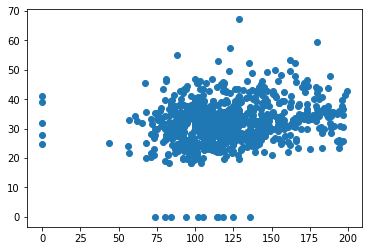

In [19]:
plt.scatter(np.array(x)[:,0],np.array(x)[:,1])
plt.show()

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


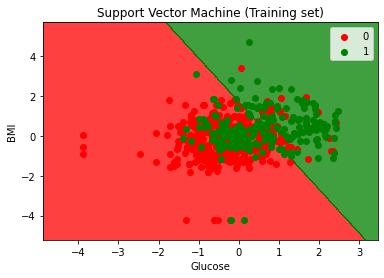

In [20]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


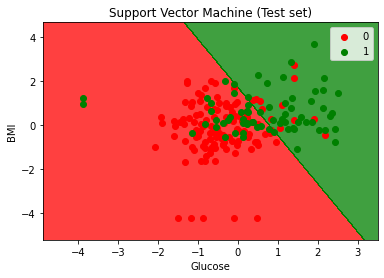

In [21]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()

### Calculating F1_Score

F1-Score adalah harmonic mean dari precision dan recall. Yang secara matematik dapat ditulis begini:

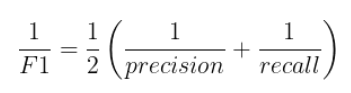

Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average='macro')

0.7234226447709593

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

## Confusion matrix

Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif, True Negatif, False Positif, dan False Negatif.Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.

manfaat dari confusion matrix:
- Menunjukkan bagaimana model ketika membuat prediksi.
- Tidak hanya memberi informasi tentang kesalahan yang dibuat oleh model tetapi juga jenis kesalahan yang dibuat.
- Setiap kolom dari confusion matrix merepresentasikan instance dari kelas prediksi.
- Setiap baris dari confusion matrix mewakili instance dari kelas aktual.

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       123
           1       0.75      0.52      0.62        69

    accuracy                           0.77       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.77      0.75       192

Confusion matrix, without normalization
[[111  12]
 [ 33  36]]


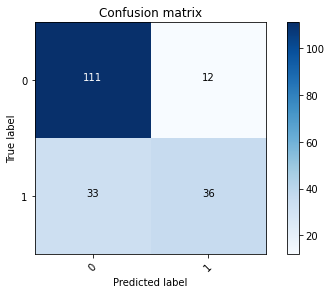

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion matrix')

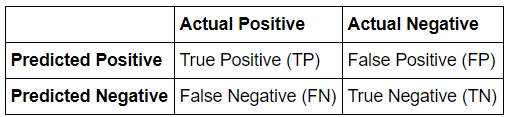

- True Positive (TP)
Merupakan data positif yang diprediksi benar. 
- True Negative (TN)
Merupakan data negatif yang diprediksi benar.
- False Postive (FP) 
Merupakan data negatif namun diprediksi sebagai data positif. 
- False Negative (FN) 
Merupakan data positif namun diprediksi sebagai data negatif.

### Accuracy

Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar. Maka, accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data.
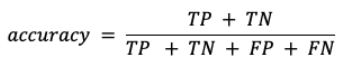

### Precision (Positive Predictive Value)

Precision menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
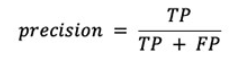

### Recall atau Sensitivity (True Positive Rate)
Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi.
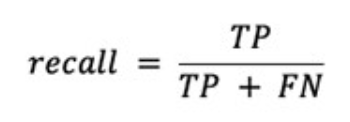